<a href="https://colab.research.google.com/github/soniapachecomza/python-practica/blob/main/ML_clasificacion_con_SKLearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Machine Learning: Clasificación con SKLearn**

En esta notebook estaremos desarrollando varios ejercicios para entender como funcionan algunos algoritmos de clasificación

#Aula 1: Introducción a la clasificación 

In [13]:
# features 1= sí y 0= no
#tiene el pelo largo?
#tiene las uñas largas?
#hace miau?

perro1= [0,1,1]
perro2= [1,0,1]
perro3= [1,1,1]

gato1= [0,1,0]
gato2= [0,1,1]
gato3= [1,1,0]

x_train = [perro1, perro2, perro3, gato1, gato2, gato3]
y_train = [1,1,1,0,0,0]

In [14]:
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(x_train,y_train)

LinearSVC()

In [15]:
animal_misterioso= [1,1,1]
model.predict([animal_misterioso])

array([1])

In [16]:
misterioso1 = [1,1,1]
misterioso2 = [1,1,0]
misterioso3 = [0,1,1]

x_test = [misterioso1, misterioso2, misterioso3]
y_test = [0,1,1]

In [19]:
previsiones= model.predict(x_test)

In [20]:
correctos = (previsiones==y_test).sum()
total = len(x_test)
tasa_de_aciertos = correctos/total
print(f'La tasa de aciertos fue de: {round(tasa_de_aciertos*100,2)}%')

La tasa de aciertos fue de: 33.33%


In [21]:
from sklearn.metrics import accuracy_score

tasa_de_aciertos = accuracy_score(y_test, previsiones)
print(f'La tasa de aciertos fue de: {round(tasa_de_aciertos*100,2)}%')

La tasa de aciertos fue de: 33.33%


#Aula 2: Pruebas replicables, estratificación, lectura de datos de internet

In [22]:
import pandas as pd
uri = 'https://gist.githubusercontent.com/ahcamachod/38673f75b54ec62ffc290eff8e7c716e/raw/6eaa07e199d9f668bf94a034cb84dac58c82fa4f/tracking.csv'
datos = pd.read_csv(uri)
datos.sample(5)

,home,how_it_works,contact,bought
40,0,1,0,0
36,1,0,1,1
5,1,0,1,1
24,1,0,1,1
0,1,1,0,0


In [24]:
mapa = {
          "home":"principal", 
          "how_it_works":"como_funciona",
          "contact":"contacto",
          "bought":"compro"
        }
datos = datos.rename(columns=mapa)
datos.sample(3)

,principal,como_funciona,contacto,compro
38,1,1,0,0
60,1,0,1,1
6,1,1,0,0


In [25]:
x = datos[['principal', 'como_funciona', 'contacto']]
x.head()

,principal,como_funciona,contacto
0,1,1,0
1,1,1,0
2,1,1,0
3,1,1,0
4,1,1,0


In [26]:
y = datos.compro
y.head()

0    0
1    0
2    0
3    0
4    0
Name: compro, dtype: int64

In [27]:
datos.shape

(99, 4)

In [28]:
x_train = x[:75]
y_train = y[:75]
x_test = x[75:]
y_test = y[75:]

In [50]:
y_train.value_counts()

0    49
1    25
Name: compro, dtype: int64

In [54]:
27/75

0.36

In [51]:
y_test.value_counts()

0    17
1     8
Name: compro, dtype: int64

In [55]:
6/24

0.25

In [29]:
print(f"Entrenaremos con {len(x_train)} elementos y probaremos con {len(x_test)} elementos")

Entrenaremos con 75 elementos y probaremos con 24 elementos


In [30]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

model = LinearSVC()
model.fit(x_train,y_train)
previsiones= model.predict(x_test)

tasa_de_aciertos = accuracy_score(y_test, previsiones)
print(f'La tasa de aciertos fue de: {round(tasa_de_aciertos*100,2)}%')


La tasa de aciertos fue de: 95.83%


In [48]:
from sklearn.model_selection import train_test_split
SEED=42
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=SEED)

model = LinearSVC()
model.fit(x_train,y_train)
previsiones= model.predict(x_test)

tasa_de_aciertos = accuracy_score(y_test, previsiones)
print(f'La tasa de aciertos fue de: {round(tasa_de_aciertos*100,2)}%')

La tasa de aciertos fue de: 96.0%


In [56]:
from sklearn.model_selection import train_test_split
SEED=42
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=SEED, stratify=y)

model = LinearSVC()
model.fit(x_train,y_train)
previsiones= model.predict(x_test)

tasa_de_aciertos = accuracy_score(y_test, previsiones)
print(f'La tasa de aciertos fue de: {round(tasa_de_aciertos*100,2)}%')

La tasa de aciertos fue de: 96.0%


In [57]:
y_train.value_counts()

0    49
1    25
Name: compro, dtype: int64

In [59]:
25/74

0.33783783783783783

In [58]:
y_test.value_counts()

0    17
1     8
Name: compro, dtype: int64

In [60]:
8/25

0.32

#Aula 3: Proyecto de baja dimensionalidad y Baseline

In [61]:
uri = 'https://gist.githubusercontent.com/ahcamachod/7c55640f0d65bcbd31bb986bb599180c/raw/1b616e97a8719b3ff245fcdd68eaebdb8da38082/projects.csv'

datos = pd.read_csv(uri)
datos.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [64]:
mapa = {
          'unfinished':'no_finalizado',
          'expected_hours':'horas_esperadas',
          'price':'precio'
        }

datos = datos.rename(columns=mapa)
datos.sample(3)

,no_finalizado,horas_esperadas,precio
1162,0,85,12687
1387,0,44,698
1727,0,56,1718


In [65]:
cambio = {1:0, 0:1}

datos['finalizado'] = datos.no_finalizado.map(cambio)

,no_finalizado,horas_esperadas,precio,finalizado
185,1,41,271,0
931,1,6,155,0
1608,0,91,15344,1
804,1,62,1199,0
1731,0,75,7188,1


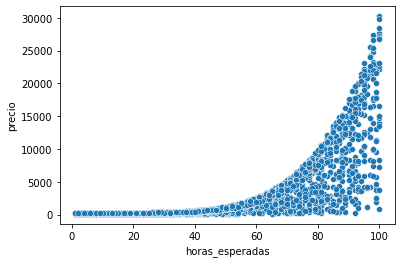

In [67]:
import seaborn as sns

sns.scatterplot(x='horas_esperadas', y='precio', data=datos)

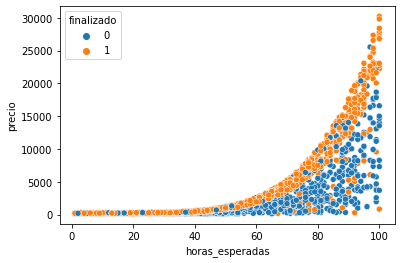

In [68]:
sns.scatterplot(x='horas_esperadas', y='precio',hue='finalizado', data=datos)

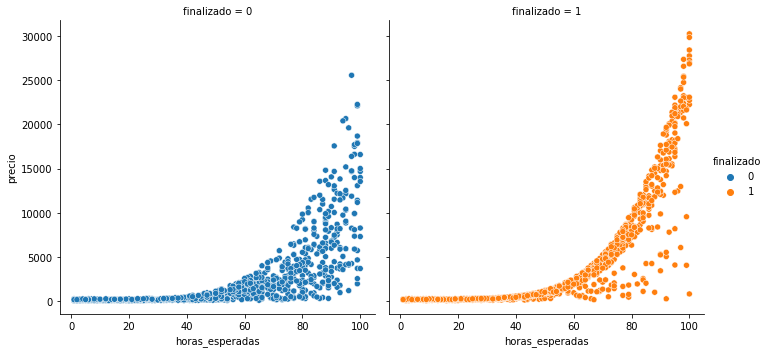

In [69]:
sns.relplot(x='horas_esperadas', y='precio',hue='finalizado', data=datos, col='finalizado')

In [70]:
import numpy as np

x= datos[['horas_esperadas', 'precio']]
y= datos.finalizado

SEED=42
np.random.seed(SEED)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)
print(f"Entrenaremos con {len(x_train)} elementos y probaremos con {len(x_test)} elementos")

model = LinearSVC()
model.fit(x_train,y_train)
previsiones= model.predict(x_test)

tasa_de_aciertos = accuracy_score(y_test, previsiones)
print(f'La tasa de aciertos fue de: {round(tasa_de_aciertos*100,2)}%')

Entrenaremos con 1617 elementos y probaremos con 540 elementos
La tasa de aciertos fue de: 47.96%


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [71]:
base_previsiones = np.ones(540)
tasa_de_aciertos = accuracy_score(y_test, previsiones)
print(f'La tasa de aciertos fue de: {round(tasa_de_aciertos*100,2)}%')

La tasa de aciertos fue de: 47.96%


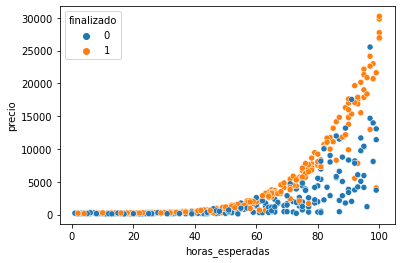

In [72]:
sns.scatterplot(x='horas_esperadas', y='precio', hue=y_test, data=x_test)

In [75]:
x_min = x_test.horas_esperadas.min()
x_max = x_test.horas_esperadas.max()
y_min = x_test.precio.min()
y_max = x_test.precio.max()

In [76]:
pixels = 100
eje_x = np.arange(x_min, x_max, (x_max-x_min)/pixels)
eje_y = np.arange(y_min, y_max, (y_max-y_min)/pixels)

In [78]:
xx, yy = np.meshgrid(eje_x, eje_y)
puntos = np.c_[xx.ravel(), yy.ravel()]
puntos

array([[1.000000e+00, 1.020000e+02],
       [1.990000e+00, 1.020000e+02],
       [2.980000e+00, 1.020000e+02],
       ...,
       [9.703000e+01, 2.992179e+04],
       [9.802000e+01, 2.992179e+04],
       [9.901000e+01, 2.992179e+04]])

In [79]:
Z = model.predict(puntos)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


In [81]:
Z = Z.reshape(xx.shape)
Z

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

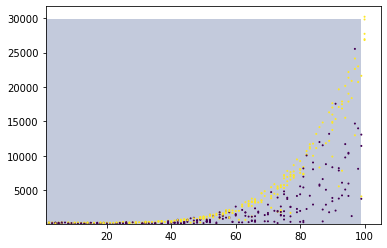

In [82]:
import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(x_test.horas_esperadas, x_test.precio, c=y_test, s=1)

#Aula 4: Soporte de Vector Machines y sistemas no lineales

Entrenaremos con 1617 elementos y probaremos con 540 elementos
La tasa de aciertos fue de: 69.26%


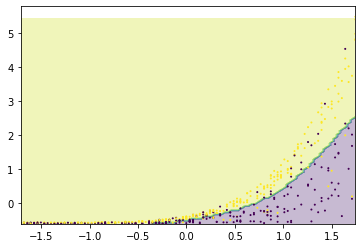

In [84]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

x= datos[['horas_esperadas', 'precio']]
y= datos.finalizado

SEED=42
np.random.seed(SEED)

raw_x_train, raw_x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)
print(f"Entrenaremos con {len(x_train)} elementos y probaremos con {len(x_test)} elementos")

scaler = StandardScaler()
scaler.fit(raw_x_train)
x_train = scaler.transform(raw_x_train)
x_test = scaler.transform(raw_x_test)

model = SVC()
model.fit(x_train,y_train)
previsiones= model.predict(x_test)

data_x = x_test[:,0]
data_y = x_test[:,1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100
eje_x = np.arange(x_min, x_max, (x_max-x_min)/pixels)
eje_y = np.arange(y_min, y_max, (y_max-y_min)/pixels)

xx, yy = np.meshgrid(eje_x, eje_y)
puntos = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(puntos)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(data_x, data_y, c=y_test, s=1)

tasa_de_aciertos = accuracy_score(y_test, previsiones)
print(f'La tasa de aciertos fue de: {round(tasa_de_aciertos*100,2)}%')